# Statistics for Data Science with Python


## Peer-Graded Assignment

##### by Daryna Manzheliivska

### Project Scenario:

You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following.

- Is there a significant difference in the median value of houses bounded by the Charles river or not?
- Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?
- Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

- What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

Using the appropriate graphs and charts, generate basic statistics and visualizations that you think will be useful for the upper management to give them important insight given the question they are asking, in your graphs, include an explanation of each statistic. 

###  Task 1 - Familiarize yourself with the dataset

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| CRIM|	per capita crime rate by town|
| ZN|	proportion of residential land zoned for lots over 25,000 sq.ft.|
| INDUS| proportion of non-retail business acres per town.	|
| CHAS| Charles River dummy variable (1 if tract bounds river; 0 otherwise)	|
| NOX|	nitric oxides concentration (parts per 10 million)|
| RM|	average number of rooms per dwelling|
| AGE|	proportion of owner-occupied units built prior to 1940 |
| DIS|	weighted distances to five Boston employment centres |
| RAD|	index of accessibility to radial highways |
| TAX |	full-value property-tax rate per 10,000  |
| PTRATIO |	 pupil-teacher ratio by town|
| LSTAT|  lower status of the population|
| MEDV | Median value of owner-occupied homes in 1000s|

### Task 2 - Created Jupiter Notebook project and Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime
import scipy.stats

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.2)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)

np.random.seed(0)
np.set_printoptions(suppress=True)

### Task 3 - Load in the Dataset in your Jupyter Notebook

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [3]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


### Task 4 - Generate Descriptive Statistics and Visualizations

#### 4.1 For the "Median value of owner-occupied homes" provide a boxplot

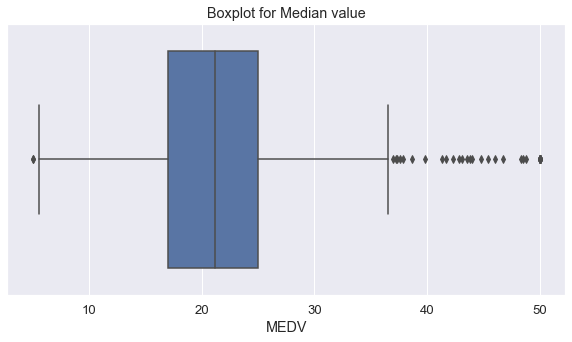

In [4]:
plt.figure(figsize=(10,5))
sns.boxplot(x=boston_df.MEDV)
plt.title("Boxplot for Median value")
plt.show()

#### 4.2 Provide a  histogram for the Charles river variable

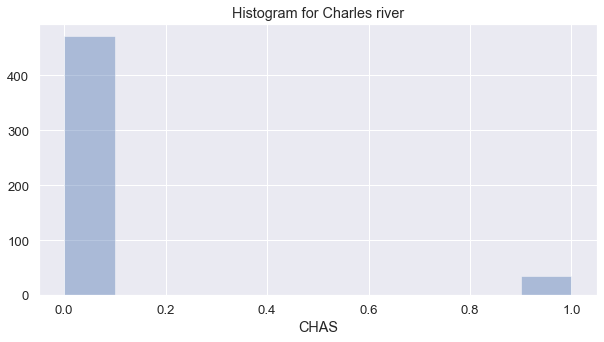

In [5]:
plt.figure(figsize=(10,5))
sns.distplot(a=boston_df.CHAS,bins=10, kde=False)
plt.title("Histogram for Charles river")
plt.show()

#### 4.3 Provide a boxplot for the MEDV variable vs the AGE variable.

(Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [6]:
boston_df.loc[(boston_df["AGE"] <= 35),'age_group'] = '35 years and younger'
boston_df.loc[(boston_df["AGE"] > 35) & (boston_df["AGE"]<70),'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df["AGE"] >= 70),'age_group'] = '70 years and older'

In [7]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years


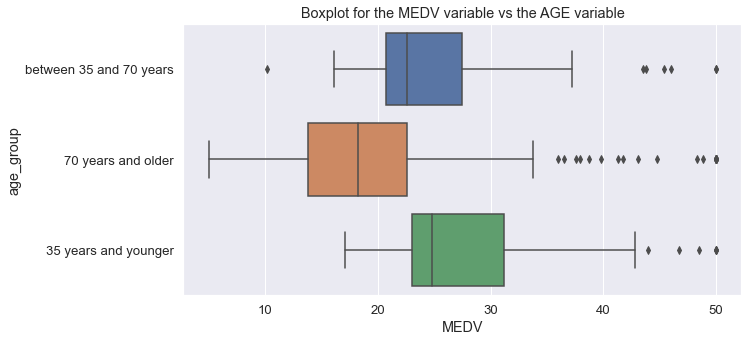

In [8]:
plt.figure(figsize=(10,5))
sns.boxplot(x=boston_df.MEDV, y=boston_df.age_group, data=boston_df)
plt.title("Boxplot for the MEDV variable vs the AGE variable")
plt.show()

#### 4.4 Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

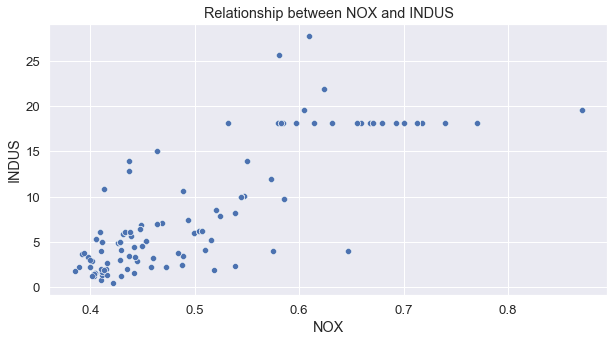

In [9]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=boston_df.NOX, y=boston_df.INDUS, data=boston_df)
plt.title("Relationship between NOX and INDUS")
plt.show()

#### 4.5 Create a histogram for the pupil to teacher ratio variable

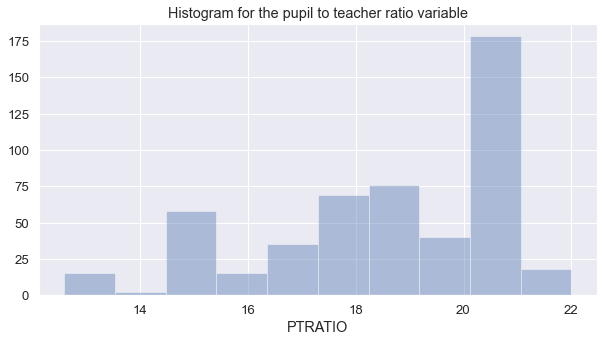

In [10]:
plt.figure(figsize=(10,5))
sns.distplot(a=boston_df.PTRATIO,bins=10, kde=False)
plt.title("Histogram for the pupil to teacher ratio variable")
plt.show()

### Task 5: Use the appropriate tests to answer the questions provided

#### 5.1 Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Hypothesis

-   $H_0:$ Both average MEDV are the same

-   $H_1:$ Both average MEDV are NOT the same

In [11]:
boston_df["CHAS"].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [12]:
a = boston_df[boston_df["CHAS"] == 0]["MEDV"]

In [13]:
b = boston_df[boston_df["CHAS"] == 1]["MEDV"]

In [14]:
scipy.stats.ttest_ind(a,b,axis=0,equal_var=True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

Since obtained p-value is < alpha 0.05, we reject our null hypothesis and conclude that a significant difference in median value of houses bounded by the Charles river does exist.

#### 5.2 Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [15]:
boston_df["AGE"].value_counts()

100.0    43
96.0      4
98.2      4
95.4      4
97.9      4
         ..
47.6      1
92.7      1
13.9      1
58.4      1
40.1      1
Name: AGE, Length: 356, dtype: int64

In [16]:
boston_df.loc[(boston_df["AGE"] <= 35),'age_group'] = '35 years and younger'
boston_df.loc[(boston_df["AGE"] > 35) & (boston_df["AGE"]<70),'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df["AGE"] >= 70),'age_group'] = '70 years and older'

In [17]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years


Hypothesis

-   $H_0: µ\_1 = µ\_2 = µ\_3$ (three population means are equal)
-   $H_1:$ (at least one population means differs from others)


In [18]:
young = boston_df[boston_df["age_group"] == '35 years and younger']["MEDV"]
mid = boston_df[boston_df["age_group"] == 'between 35 and 70 years']["MEDV"]
old = boston_df[boston_df["age_group"] == '70 years and older']["MEDV"]

In [19]:
f_stats, p_value = scipy.stats.f_oneway(young,mid,old,axis=0)

In [20]:
print("F-Statistic={0}, P-value={1}".format(f_stats,p_value))

F-Statistic=36.40764999196599, P-value=1.7105011022702984e-15


Since p-value is < alpha 0.05, we reject our null hypothesis and conclude that at least one population means differs from others.

#### 5.3 Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Hypothesis

-   $H_0:$ NOX is not correlated with INDUS

-   $H_1:$ NOX is correlated with INDUS


Since they are both continuous variables we can use a pearson correlation test and draw a scatter plot.

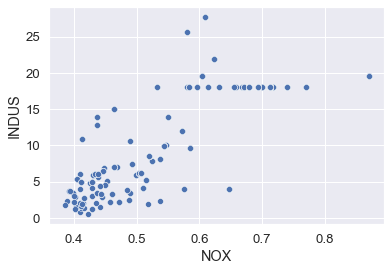

In [21]:
ax = sns.scatterplot(x="NOX", y="INDUS", data=boston_df)

In [22]:
pearson,p_value = scipy.stats.pearsonr(boston_df["NOX"],boston_df["INDUS"])

In [23]:
print("Pearson Coefficient value={0}, P-value={1}".format(pearson,p_value))

Pearson Coefficient value=0.763651446920915, P-value=7.913361061239593e-98


Since the p-value is less than alpha 0.05, we reject our null hypothesis and conclude that there exists a relationship between Nitric Oxide and non-retail business acres per town.

#### 5.4. What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [24]:
boston_df.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV', 'age_group'], dtype='object')

In [25]:
y = boston_df['MEDV']
x = boston_df['DIS']

In [26]:
x = sm.add_constant(x)

In [27]:
results = sm.OLS(y,x).fit()

In [28]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 06 Mar 2021   Prob (F-statistic):           1.21e-08
Time:                        14:53:31   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
np.sqrt(0.062)  ##Pearson Coeffiecent value

0.24899799195977465

The square root of R-squared is 0.25, which implies weak correlation between both features

### Correlation

In [30]:
boston_df.corr()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
Unnamed: 0,1.000000,0.407407,-0.103393,0.399439,-0.003759,0.398736,-0.079971,0.203784,-0.302211,0.686002,0.666626,0.291074,0.258465,-0.226604
CRIM,0.407407,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
ZN,-0.103393,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
INDUS,0.399439,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
CHAS,-0.003759,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
NOX,0.398736,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
RM,-0.079971,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
AGE,0.203784,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
DIS,-0.302211,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
RAD,0.686002,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626


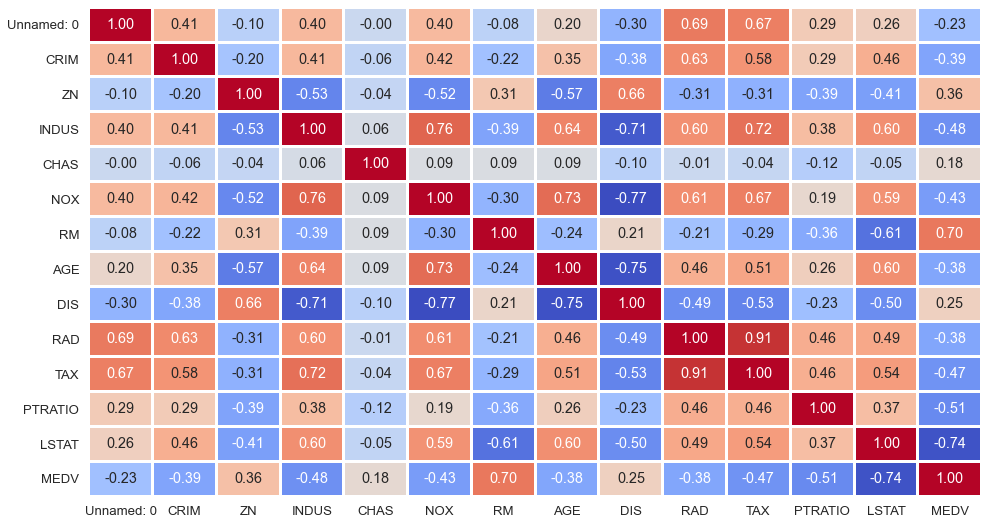

In [31]:
plt.figure(figsize=(16,9))
sns.heatmap(boston_df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2, cbar=False)
plt.show()

### This concludes this Peer-Review Assignment. Thank you for your time and attention! :)